In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
import yaml

In [2]:
!pip install -U pyYAML

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
cfg = yaml.full_load(open("/content/drive/MyDrive/FP/config.yml", 'r'))

In [15]:
covid = cfg['PATHS']['COVID']
normal = cfg['PATHS']['NORMAL']
pneumonia = cfg['PATHS']['PNEUMONIA']

In [16]:
print("COVID Images : " + str(len(os.listdir(covid))))
print("Normal Images : " + str(len(os.listdir(normal))))
print("Pneumonia Images : " + str(len(os.listdir(pneumonia))))

COVID Images : 1089
Normal Images : 1231
Pneumonia Images : 1345


In [19]:
filenames = os.listdir(covid) + os.listdir(normal) + os.listdir(pneumonia)
print("Total Images : " + str(len(filenames)))


Total Images : 3665


In [20]:
categories = []
categories_str = []
for filename in filenames:
    category = filename.split('-')[0]
    if category == 'COVID':
        categories.append(str(1))
        categories_str.append("Covid")
    elif category == 'Normal':
        categories.append(str(0))
        categories_str.append("Normal")
    elif category == 'Viral Pneumonia':
        categories.append(str(2))
        categories_str.append("Viral Pneumonia")

In [21]:
# creating dataframe form the filenames and the category
for i in range(len(filenames)):
    if 'COVID' in filenames[i]:
        filenames[i] = os.path.join(covid, filenames[i])
    elif 'Normal' in filenames[i]:
        filenames[i] = os.path.join(normal, filenames[i])
    elif 'Viral Pneumonia' in filenames[i]:
        filenames[i] = os.path.join(pneumonia, filenames[i])

In [37]:
df = pd.DataFrame({
    'filename': filenames,
    'category': categories,
    'category_str': categories_str
})
df.sample(5)

,filename,category,category_str
1398,/content/drive/MyDrive/FP/COVID-19_Radiography...,0,Normal
100,/content/drive/MyDrive/FP/COVID-19_Radiography...,1,Covid
2223,/content/drive/MyDrive/FP/COVID-19_Radiography...,0,Normal
2472,/content/drive/MyDrive/FP/COVID-19_Radiography...,2,Viral Pneumonia
1367,/content/drive/MyDrive/FP/COVID-19_Radiography...,0,Normal


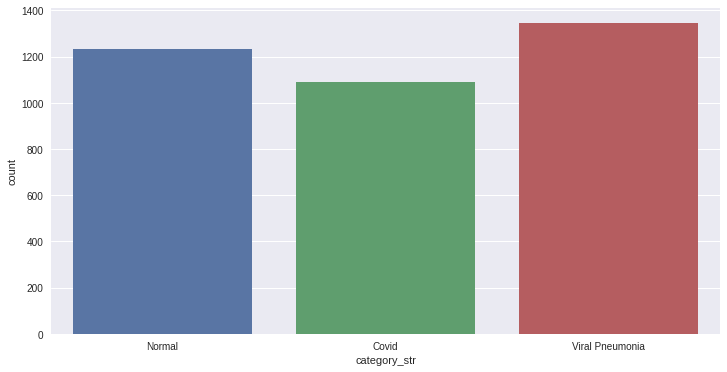

In [23]:
plt.style.use("seaborn")
plt.figure(figsize=(12, 6))
sns.countplot(data=df.sort_values(by='category'), x='category_str')
plt.show()


In [24]:
train_data, test_valid_data = train_test_split(
    df, 
    test_size=0.4,
    random_state=42,
    shuffle=True, 
    stratify=df['category'])

train_data = train_data.reset_index(drop=True)
test_valid_data = test_valid_data.reset_index(drop=True)

test_data, valid_data = train_test_split(
    test_valid_data, 
    test_size=0.5, 
    random_state=42, 
    shuffle=True, 
    stratify=test_valid_data['category'])

test_data = test_data.reset_index(drop=True)
valid_data = valid_data.reset_index(drop=True)

In [26]:
train_data.to_csv(cfg['PATHS']['TRAIN_SET'])
test_data.to_csv(cfg['PATHS']['TEST_SET'])
valid_data.to_csv(cfg['PATHS']['VALID_SET'])

In [31]:
train_df = pd.read_csv(cfg['PATHS']['TRAIN_SET'])
train_df.head()

,Unnamed: 0,filename,category,category_str
0,0,/content/drive/MyDrive/FP/COVID-19_Radiography...,1,Covid
1,1,/content/drive/MyDrive/FP/COVID-19_Radiography...,1,Covid
2,2,/content/drive/MyDrive/FP/COVID-19_Radiography...,1,Covid
3,3,/content/drive/MyDrive/FP/COVID-19_Radiography...,2,Viral Pneumonia
4,4,/content/drive/MyDrive/FP/COVID-19_Radiography...,1,Covid


In [32]:
test_df = pd.read_csv(cfg['PATHS']['TEST_SET'])
test_df.head()

,Unnamed: 0,filename,category,category_str
0,0,/content/drive/MyDrive/FP/COVID-19_Radiography...,2,Viral Pneumonia
1,1,/content/drive/MyDrive/FP/COVID-19_Radiography...,1,Covid
2,2,/content/drive/MyDrive/FP/COVID-19_Radiography...,1,Covid
3,3,/content/drive/MyDrive/FP/COVID-19_Radiography...,2,Viral Pneumonia
4,4,/content/drive/MyDrive/FP/COVID-19_Radiography...,0,Normal


In [34]:
valid_df = pd.read_csv(cfg['PATHS']['VALID_SET'])
valid_df.head()

,Unnamed: 0,filename,category,category_str
0,0,/content/drive/MyDrive/FP/COVID-19_Radiography...,2,Viral Pneumonia
1,1,/content/drive/MyDrive/FP/COVID-19_Radiography...,1,Covid
2,2,/content/drive/MyDrive/FP/COVID-19_Radiography...,1,Covid
3,3,/content/drive/MyDrive/FP/COVID-19_Radiography...,2,Viral Pneumonia
4,4,/content/drive/MyDrive/FP/COVID-19_Radiography...,0,Normal


In [35]:
print("The training set : " + str(len(train_df)))
print("The testing set : " + str(len(test_df)))
print("The validation set : " + str(len(valid_df)))

The training set : 2199
The testing set : 733
The validation set : 733


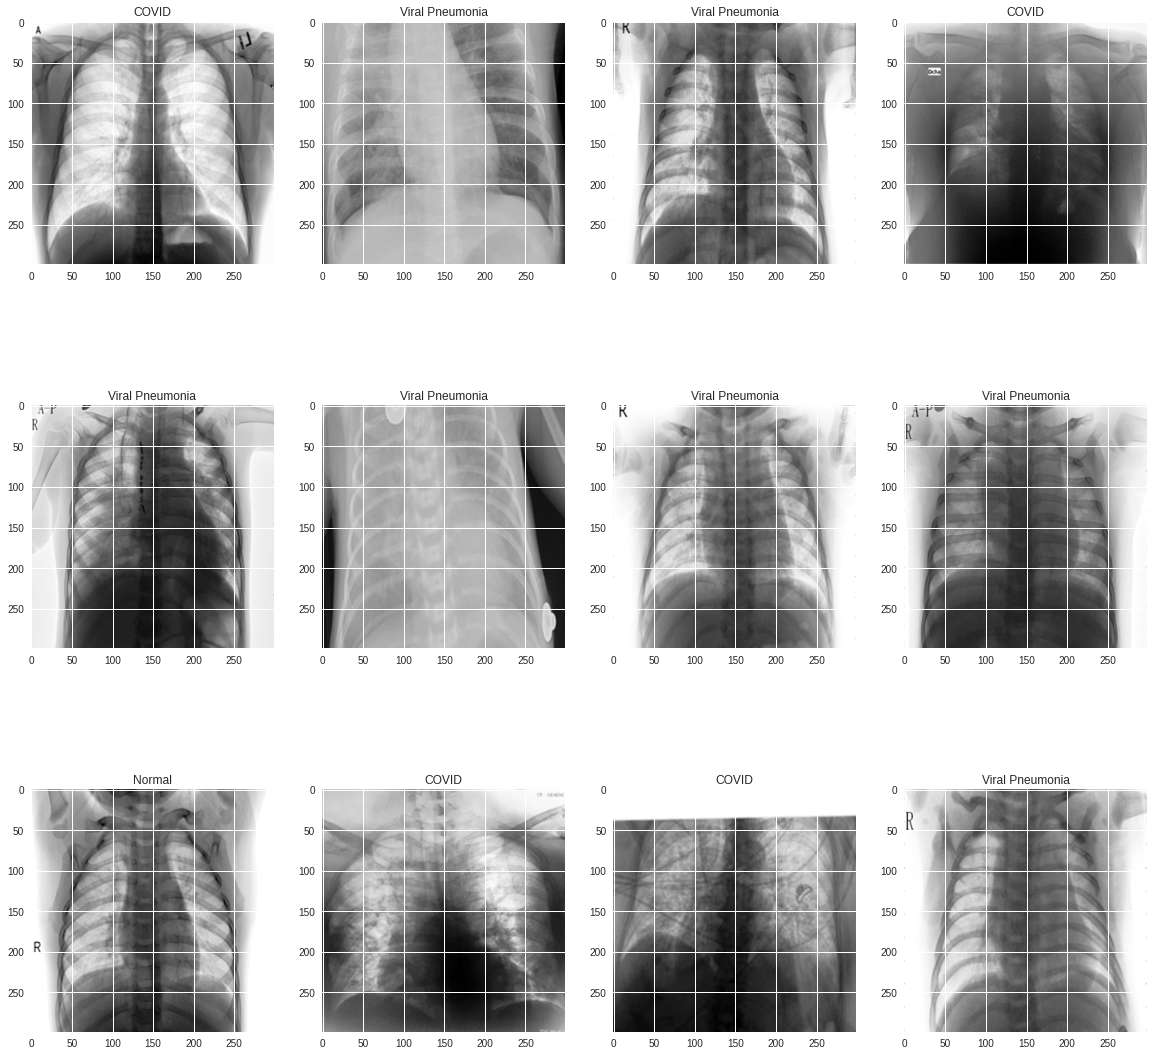

In [36]:
sample_images = train_data.sample(12)["filename"]

plt.figure(figsize=(20, 20))
for i, path in enumerate(sample_images):
    plt.subplot(3, 4, i+1)
    plt.imshow(plt.imread(path))
    plt.title(path.split("/")[-1].split("-")[0])
